In [1]:
#Poupette
import logging
import threading
from time import sleep
from pyvesc import VESC
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


serial_names = ['/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.1:1.0',
                '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.2:1.0',
                '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.3:1.0',
                '/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.4:1.0']

In [21]:
class SpeedController :
    def __init__ (self, vescpath) :
        self.rpmobj = 0
        self.k = 1e-7
        self.dt = 0.001
        self.vesc = VESC(serial_port=vescpath)
        self.current_duty_cycle = 0
        self.running = True
        self.vescpath = vescpath
        self.logs = dict()
        self.values_remaining = 0
        self.logtime = 2.0
        
        logging.info("Main    : create and start thread %d.", index)
        self.thread = threading.Thread(target=self.thread_function)
        self.thread.start()

    def thread_function(self):
        logging.info("Thread %s: started", self.vescpath)
        while self.running:
            logging.info(str(self.thread.is_alive())+self.vescpath)
            self.cycle()
    
    def set_duty_cycle(self, val):
        if val>0.5:
            val=0.5
        if val<-0.5:
            val=-0.5
        self.vesc.set_duty_cycle(val)

    def target_log(self, value):
        self.rpmobj = value
        self.values_remaining = int(self.logtime/self.dt)
        self.logs["rpm_obj"] = list()
        self.logs["rpm"] = list()
        self.logs["duty_cycle"] = list()

    def plot(self):
        x = np.arange(0, int(len(self.logs["rpm_obj"])*self.dt), self.dt)
        fig, ax1 = plt.subplots()
        ax1.plot(x, self.logs["rpm_obj"], "--", color='green', label="Target (RPM)")
        ax1.plot(x, self.logs["rpm"], label="Current (RPM)")
        plt.xlabel('Time (s)')
        ax2 = ax1.twinx() 
        ax2.plot(x, self.logs["duty_cycle"], color='red', label="Duty cycle")
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        plt.show()
    
    def asserv(self, rpm):
        err = self.rpmobj - rpm
        delta = self.k * err
        return(delta)
    
    def cycle(self):
        try:
            rpm = self.vesc.get_rpm()
        except AttributeError:
            return

        self.current_duty_cycle = self.current_duty_cycle+self.asserv(rpm)
        self.current_duty_cycle = min(max(self.current_duty_cycle, -0.5), 0.5)
        self.set_duty_cycle(self.current_duty_cycle)
        if self.values_remaining>0:
            self.values_remaining-=1
            self.logs["rpm_obj"].append(self.rpmobj)
            self.logs["rpm"].append(rpm)
            self.logs["duty_cycle"].append(self.current_duty_cycle)
        sleep(0.001)    

In [3]:
try:
    for sc in scs:
        del sc
except NameError:
    pass

In [3]:
logging.basicConfig(level=logging.WARNING)
if __name__ == "__main__":
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.INFO,
                        datefmt="%H:%M:%S")
    scs = list()
    for index in range(4):
        scs.append(SpeedController(serial_names[index]))

In [12]:
for path in serial_names:
    sleep(0.5)
    vesc = VESC(serial_port=path)
    vesc.set_duty_cycle(.0)

In [7]:
scs[0].k=1e-7

In [18]:
scs[0].target_log(0)

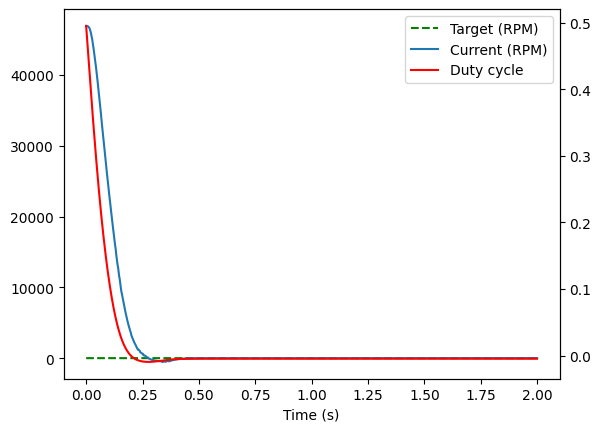

In [20]:
scs[0].plot()

In [11]:
scs[0].rpmobj = 000

In [8]:
kt[0] = True

In [ ]:
a = SpeedController(vescpath='/dev/serial/by-path/pci-0000:00:14.0-usb-0:5.1:1.0')

In [ ]:
a.rpmobj = 0
a.k = 1/1000000

In [ ]:
while True :
    a.cycle()

In [ ]:
#Bichon
from pyvesc import VESC
from time import sleep

class SpeedController :
    def __init__ (self, vescpath) :
        self.rpmobj = 0
        self.k = 0.0001
        self.vesc = VESC(serial_port=vescpath)
        self.current_duty_cycle = 0

    def set_duty_cycle(self, val):
        if val>0.5:
            val=0.5
        if val<-0.5:
            val=-0.5
        self.vesc.set_duty_cycle(val)
    
    def asserv(self, rpm):
        err = -self.rpmobj - rpm
        delta = self.k * err
        return(delta)
    
    def cycle(self):

        try:
            rpm = self.vesc.get_rpm()
        except AttributeError:
            return

        self.current_duty_cycle = self.current_duty_cycle+self.asserv(rpm)  
        self.set_duty_cycle(self.current_duty_cycle)
        sleep(0.01)